In [141]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Question1
Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [142]:
img = cv.imread('coins_1.jfif')
img_copy = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 350, param2 = 25)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        center = (i[0], i[1])

        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 0), 2)
        
blur = cv.medianBlur(img_copy, 5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

params = cv.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 200
params.filterByConvexity = False
params.filterByInertia = False

params.filterByColor = True
params.blobColor = 255

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

im_keypoints = cv.drawKeypoints(img_copy, keypoints, np.array([]), (0, 0, 255),
                               cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('Hough trasform and blob detection', np.hstack([img, im_keypoints]))
cv.waitKey(0)
cv.destroyAllWindows()

- Hough transform can detect all coins accurately except one coin which is at the top most of the image.
- Blob detections cannot accurately detect 4 coins and for other coins it can detect it accurately.
- So, Hough transform is able to provide better perfrmance than blob detection algorithms when it comes detecting the coins.

# Question 2
Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
* You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
* Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

In [143]:
img = cv.imread('zebra.jfif')
img = cv.GaussianBlur(img, (3, 3), 0)

cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

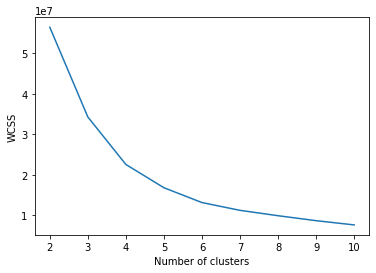

In [144]:
from sklearn.cluster import KMeans

img_reshape = img.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', 
                                        random_state = 42)
    kmeans.fit(img_reshape)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

- The point of which the elbow shape is created is 4, so the optimal k value is 4.

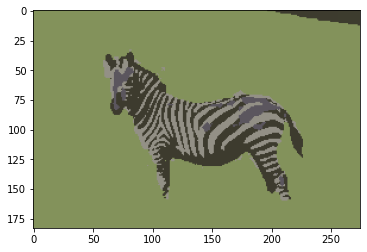

In [145]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K_hsv = 4

ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_hsv.shape)

plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.show()

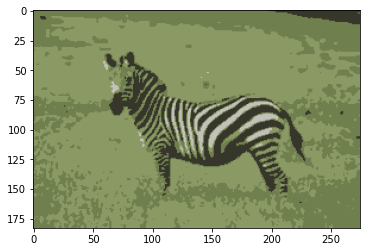

In [146]:
img_reshape_bgr = img.reshape((-1, 3))
img_reshape_bgr = np.float32(img_reshape_bgr)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K_rgb = 4

ret, label, center = cv.kmeans(img_reshape_bgr, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_img_bgr = res.reshape(img.shape)

plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.show()

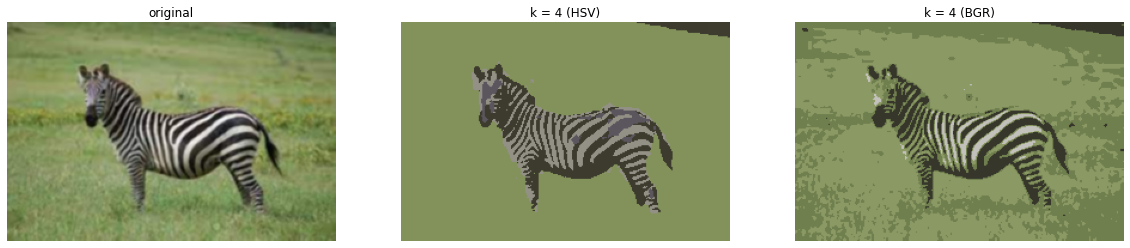

In [147]:
plt.figure(figsize = (20, 20))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.title(f'k = {K_hsv} (HSV)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f'k = {K_rgb} (BGR)'), plt.axis("off")
plt.show()

- HSV is able to segment the zebra in the image with its color which are black and white. Although, there is the present of some grey color spot on the segmented zebra.
- The color of the background (green) is present in the zebra that is segmented by BGR color space. 